<a href="https://colab.research.google.com/github/madhuri-gande/WasteManagement_Infosys/blob/main/WasteMangement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [ ]:
file_path = '/content/drive/MyDrive/CSM C OR CEP 11/waste_sensor_data.csv'  # Replace with your file path
dataset = pd.read_csv(file_path)

In [ ]:
dataset.head()


,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83


In [ ]:
dataset.tail()


,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
19995,4,2024-03-27 18:45:00,non_recyclable,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,non_recyclable,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,non_recyclable,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,organic,1.18,0.05,0.05,40.17
19999,4,2024-03-27 19:45:00,non_recyclable,1.22,0.02,0.31,18.62


In [ ]:
dataset.describe()

,sensor_id,inductive_property,capacitive_property,moisture_property,infrared_property
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.495900,1.003058,0.501873,0.501766,50.180508
std,1.115188,0.230327,0.288173,0.288086,28.836594
min,1.000000,0.600000,0.000000,0.000000,0.010000
25%,2.000000,0.810000,0.250000,0.250000,25.337500
50%,2.000000,1.000000,0.510000,0.500000,50.090000
75%,3.000000,1.200000,0.750000,0.750000,74.972500
max,4.000000,1.400000,1.000000,1.000000,100.000000


In [ ]:
dataset.isnull()

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

,0
sensor_id,0
timestamp,0
waste_type,0
inductive_property,0
capacitive_property,0
moisture_property,0
infrared_property,0


In [ ]:
pip install pandas seaborn matplotlib


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

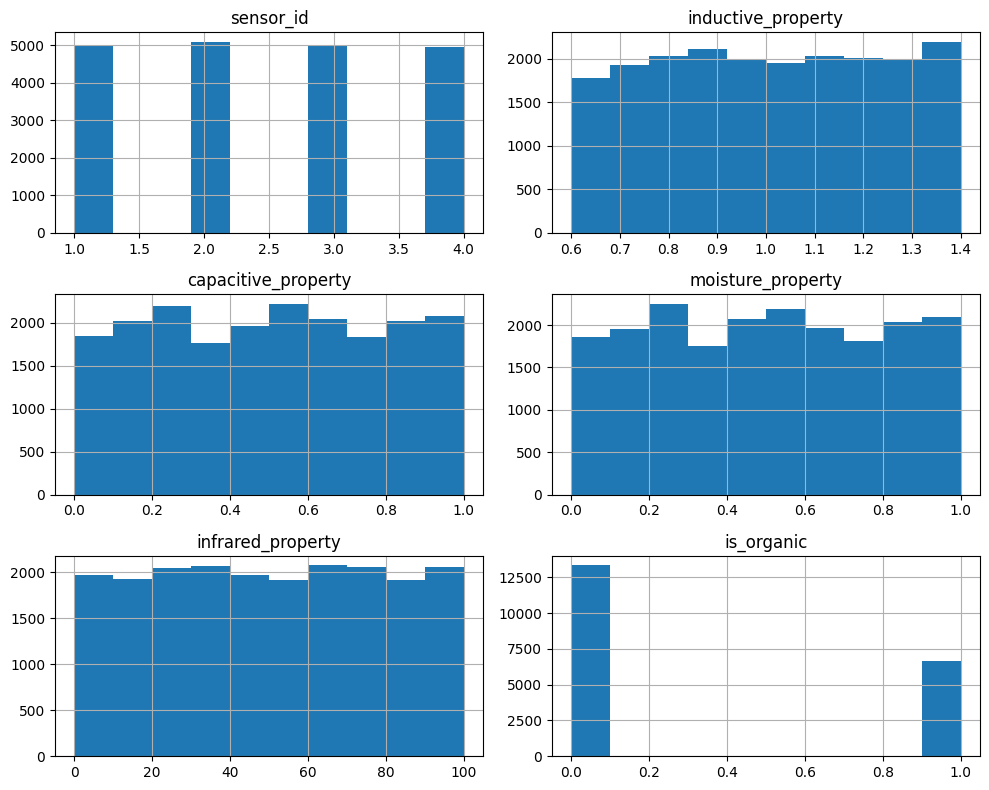

In [ ]:
# Step 3: Correlation Matrix
dataset.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

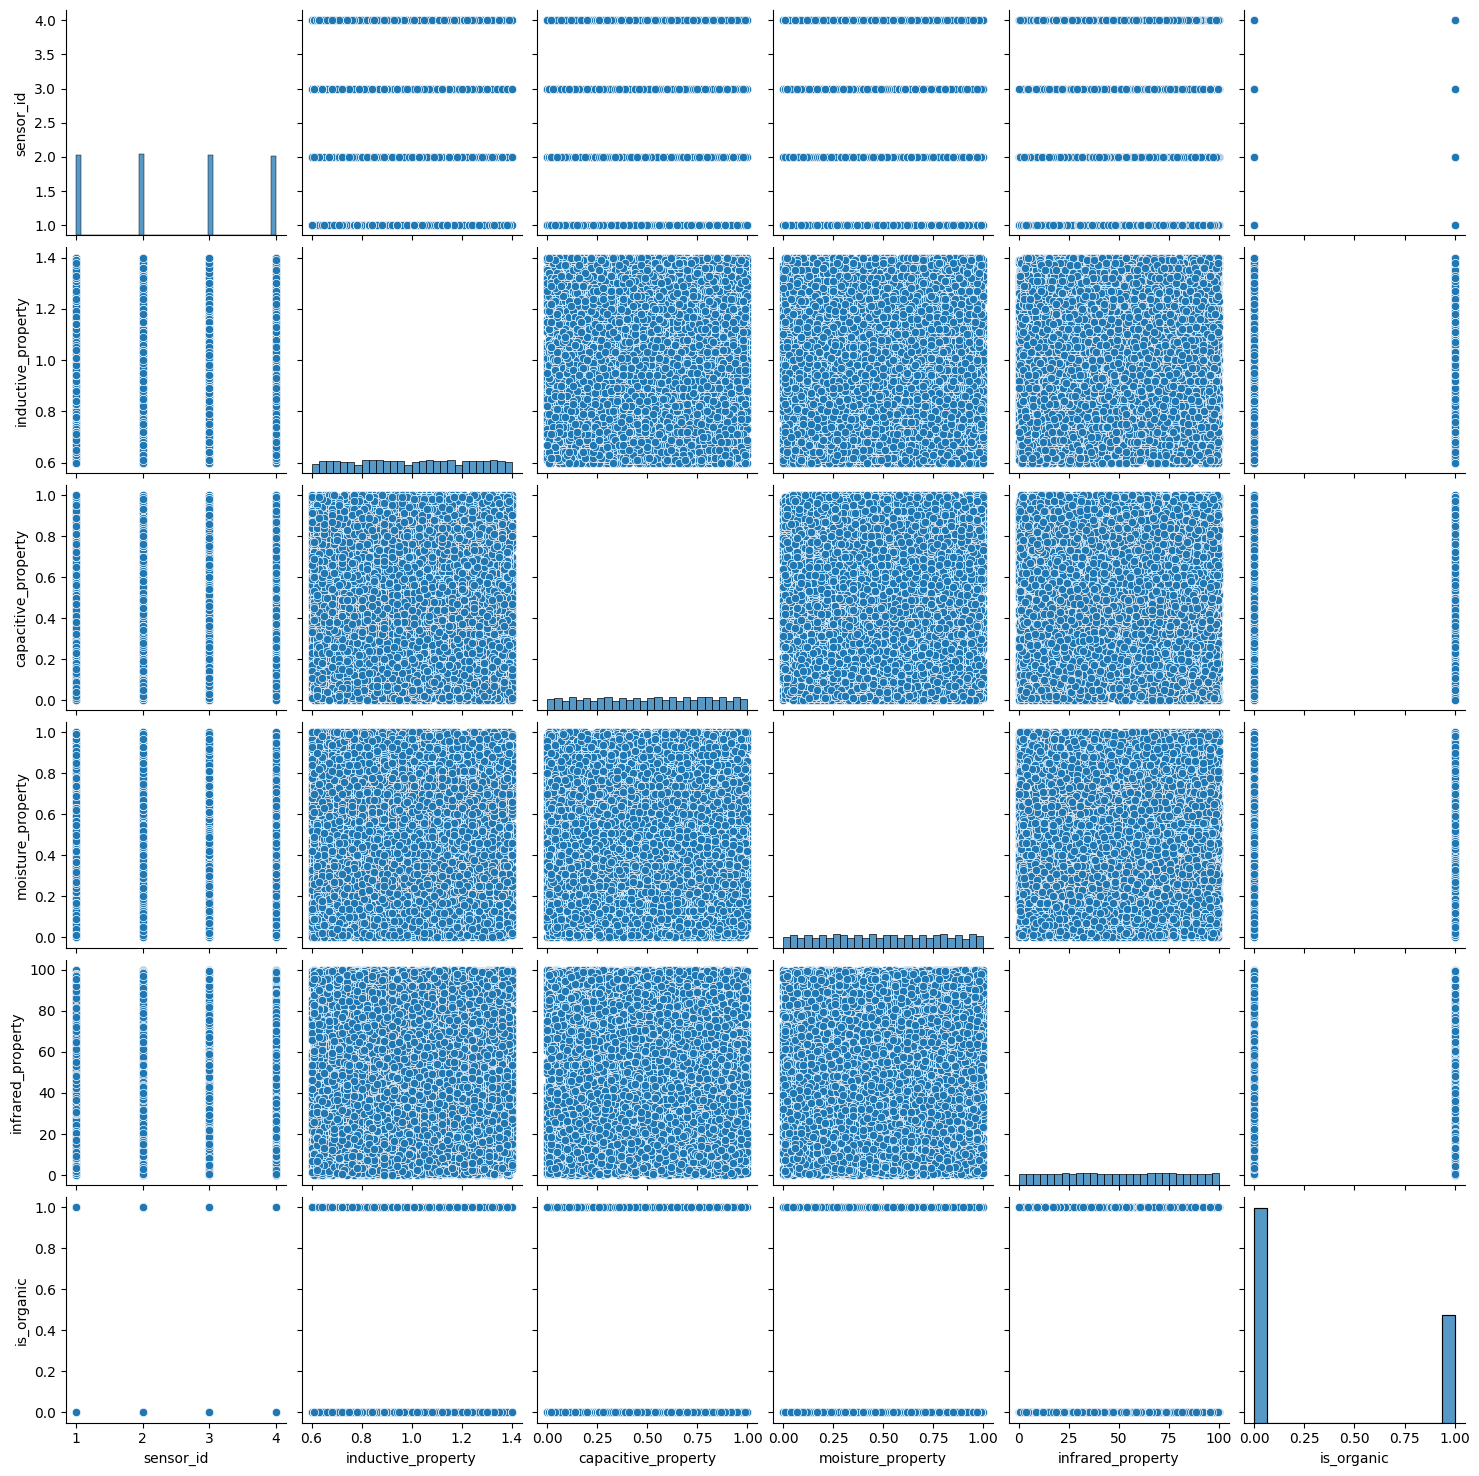

In [ ]:
# Step 4: Plot scatter plots
sns.pairplot(dataset)
plt.show()

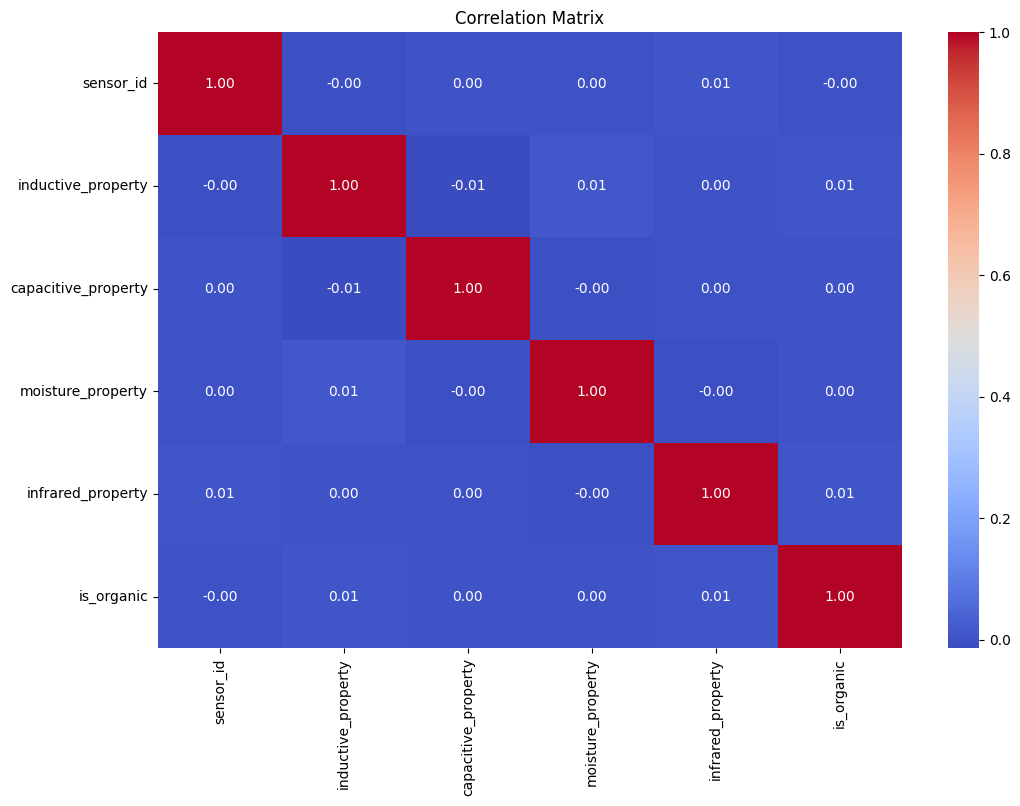

In [ ]:

dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Step 3: Compute the correlation matrix
corr_matrix = numeric_dataset.corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
dataset['is_organic'] = dataset['waste_type'].apply(lambda x: 1 if x == 'organic' else 0)

In [ ]:
dataset_cleaned = dataset.drop(columns=['sensor_id', 'timestamp', 'waste_type'])

In [ ]:
dataset.head()

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property,is_organic,hour,day,month
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27,0,12,1,9
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00,0,12,1,9
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89,0,12,1,9
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80,1,12,1,9
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83,0,13,1,9


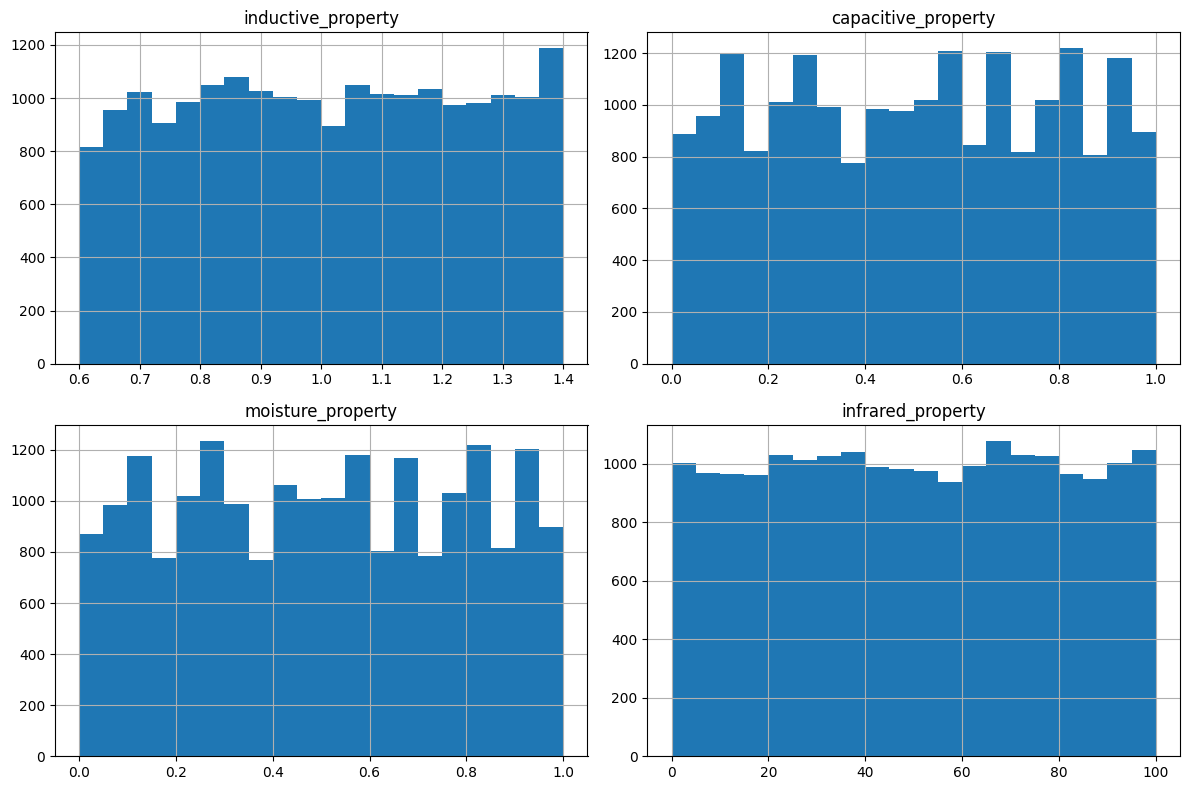

In [ ]:
numeric_columns = ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']
dataset[numeric_columns].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

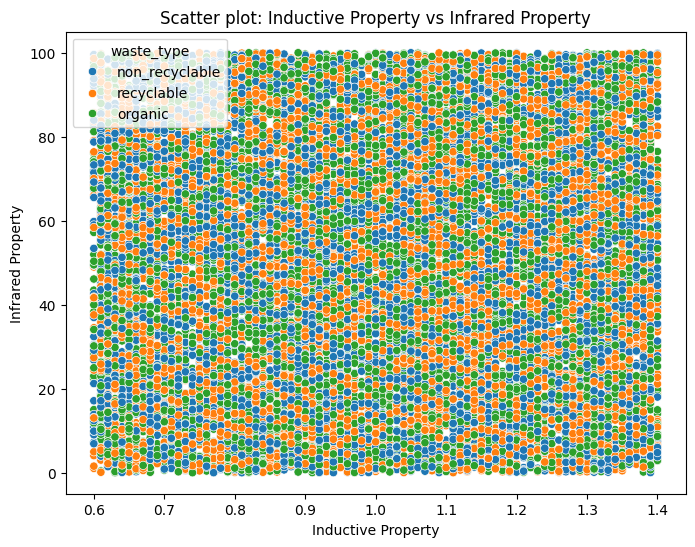

In [ ]:
# Step 4: Scatter plot to see relationships between two numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='inductive_property', y='infrared_property', hue='waste_type')
plt.title('Scatter plot: Inductive Property vs Infrared Property')
plt.xlabel('Inductive Property')
plt.ylabel('Infrared Property')
plt.show()

<ipython-input-29-674013f2f762>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='is_organic', palette='Set1')


<function matplotlib.pyplot.show(close=None, block=None)>

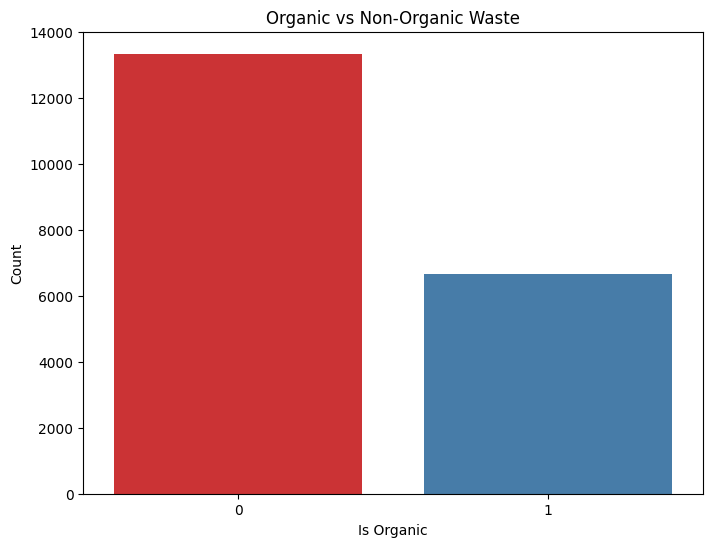

In [ ]:
# Step 6: Bar plot to show organic vs non-organic distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='is_organic', palette='Set1')
plt.title('Organic vs Non-Organic Waste')
plt.xlabel('Is Organic')
plt.ylabel('Count')
plt.show

In [ ]:
# Step 2: Separate features and target
X = dataset_cleaned.drop(columns=['is_organic'])
y = dataset_cleaned['is_organic']

In [ ]:
data = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority = data[data['is_organic'] == 0]
minority = data[data['is_organic'] == 1]

In [ ]:
minority_oversampled = resample(minority,
                                replace=True,  # Sample with replacement
                                n_samples=len(majority),  # Match majority class size
                                random_state=42)

In [ ]:
# Combine oversampled minority class with majority class
data_balanced = pd.concat([majority, minority_oversampled])

In [ ]:
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
X_balanced = data_balanced.drop(columns=['is_organic'])
y_balanced = data_balanced['is_organic']

In [ ]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 6: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=10, min_samples_split=5)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=150,
                       random_state=42)

In [ ]:
# Step 7: Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Output accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.6628582131485297

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.68      2670
           1       0.68      0.61      0.64      2669

    accuracy                           0.66      5339
   macro avg       0.66      0.66      0.66      5339
weighted avg       0.66      0.66      0.66      5339



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    verbose=1,  # Set to 1 to see progress
    n_jobs=-1   # Use all available processors
)


In [ ]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Retrieve the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Output the results
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8469750889679716

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      2670
           1       0.87      0.81      0.84      2669

    accuracy                           0.85      5339
   macro avg       0.85      0.85      0.85      5339
weighted avg       0.85      0.85      0.85      5339



In [ ]:
print(accuracy*100)

84.69750889679716
